# An optimization using Levenberg-Marquardt method

## Importing libraries

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from visual import histeq

## Defining functions

### Rosenbrock function

In [2]:
def rosenbrock_function(x,y):
    '''
    Calculate the rosenbrock map.   
    
    '''
    p1 = x
    p2 = y
    z = 100.*(p2-p1**2)**2 + (1.- p1)**2
    return z

In [3]:
def rosenbrock(p):
    '''
    Calculate the rosenbrock function.   
    
    '''
    p1 = p[0]
    p2 = p[1]
    z = 100.*(p2-p1**2)**2 + (1.- p1)**2
    return z

In [4]:
def rosenbrock_grad(p):
    '''
    Calculate the gradient of rosenbrock function.
    '''
    p1 = p[0]
    p2 = p[1]
    J1 = -400.*p1*(p2-p1**2) - 2.*(1.- p1)
    J2 = 200.*(p2-p1**2)
    J = np.array([J1,J2])
    return J

In [5]:
def residual_ros(p):
    '''
    Calculate the residual of rosenbrock function.
    '''
    p1 = p[0]
    p2 = p[1]
    J1 = 10.*(p2-p1**2)
    J2 = (1.-p1)
    r = np.array([J1,J2])
    return r

In [6]:
def sensitivity_ros(p):
    '''
    Calculate the sensitivity matrix of rosenbrock function.
    '''
    p1 = p[0]
    p2 = p[1]
    
    A11 = -20.*p1
    A12 = 10.
    A21 = -1.
    A22 = 0.
    A = np.array([A11,A12,A21,A22]).reshape(2,2)
    return A

## Parameters for calculating the rosenbrock function 

In [7]:
Nx = 20
Ny = 20

In [8]:
x = np.linspace(-5.,5.,num=Nx)
y = np.linspace(-10.,10.,num=Ny)
X,Y = np.meshgrid(x,y)

In [9]:
Z = rosenbrock_function(X,Y) 

In [10]:
Z_ros = histeq(Z).reshape(Nx,Ny)

## Visuatization of the Rosenbrock function 


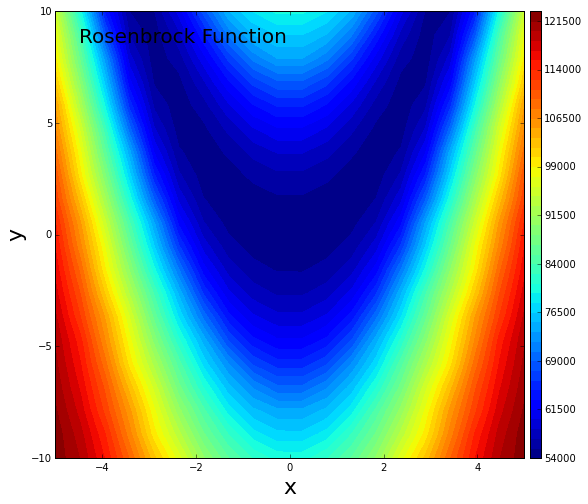

In [11]:
title_font = 22
bottom_font = 16
saturation_factor = 1.
plt.close('all')
plt.figure(figsize=(10,8))
plt.contourf(X, Y, Z_ros, 50)
plt.colorbar(pad=0.01, aspect=40, shrink=1.0)
plt.xlabel('x', fontsize = title_font)
plt.ylabel('y', fontsize = title_font)
plt.annotate('Rosenbrock Function', xy = (0.05, 0.93), xycoords = 'axes fraction', fontsize=20)

plt.show()


## Calculating the Levenberg-Marquardt method for Rosenbrock

In [12]:
itmax = 40
it_max_marq = 30
eps = 1e-10
lamb = 1.


p0 = np.array([-1.,7.])

px = [p0[0]]
py = [p0[1]]

phi_it = []
it  = []
for i in range(itmax):
        
    ros0 = rosenbrock(p0)
    r0 = residual_ros(p0)
    phi0 = np.linalg.norm(r0)
    
    for it_marq in range(it_max_marq):
        
        G = sensitivity_ros(p0)
        GtG = np.dot(G.T,G)   
        H = GtG + lamb*np.identity(2)
        ros = rosenbrock(p0)
        r = residual_ros(p0)       
        J =  rosenbrock_grad(p0)
                
        dp = np.linalg.solve(H,-J)
        p0 += dp
        
        phi = np.linalg.norm(r)        
        dphi = phi-phi0
        
        if (dphi < 0):
            lamb = lamb/20.
        else: 
            lamb = 20.*lamb
        
        r0 = r
        phi0 = phi
        ros0=ros
    
    px.append(p0[0])
    py.append(p0[1])
    phi_it.append(phi0)
    it.append(i)  

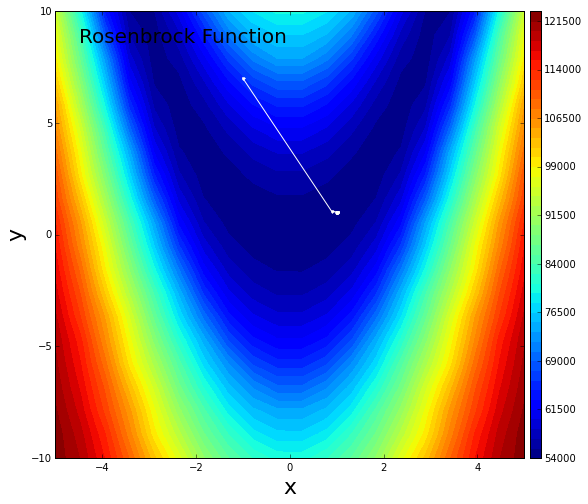

In [13]:
title_font = 22
bottom_font = 16
saturation_factor = 1.
plt.close('all')
plt.figure(figsize=(10,8))
plt.contourf(X, Y, Z_ros, 50)
plt.plot(px,py,'w.-')
plt.colorbar(pad=0.01, aspect=40, shrink=1.0)
plt.xlabel('x', fontsize = title_font)
plt.ylabel('y', fontsize = title_font)
plt.annotate('Rosenbrock Function', xy = (0.05, 0.93), xycoords = 'axes fraction', fontsize=20)

plt.show()

In [14]:
print p0

[ 0.99958183  1.00020856]


## Comparison between these two tests

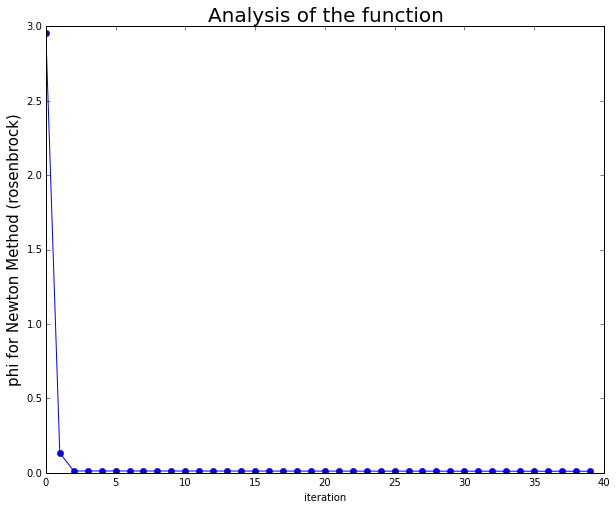

In [15]:
plt.figure(figsize=(10,8))

plt.plot(it, phi_it, 'o-')
plt.title('Analysis of the function',fontsize=20)
plt.ylabel('phi for Newton Method (rosenbrock)',fontsize=15)
plt.xlabel('iteration',)

plt.show()
